#### __Import the necessary modules for data manipulation and visualization, and ensure that any non-critical warning messages are suppressed during execution.__

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### __Load the housing dataset from a CSV file into a Pandas DataFrame for analysis.__

In [29]:
df = pd.read_csv("housing.csv")

#### __Check the total number of rows and columns in the dataset to understand its size.__

In [30]:
print(df.shape)


(545, 2)


#### __Display a summary of the DataFrame, including the column names, data types, and the presence of any null (missing) values.__

In [31]:
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   545 non-null    int64
 1   area    545 non-null    int64
dtypes: int64(2)
memory usage: 8.6 KB
None


#### __Print the first five rows of the dataset to get a quick look at the actual data values.__

In [32]:
df.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


#### __Generate a statistical summary (mean, standard deviation, min, max, etc.) for all the numerical columns in the DataFrame.__

In [33]:
df.describe()
df.describe().T


,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0


#### __Create a scatter plot to visualize the relationship between the house area and its price to see if there is a visible correlation.__

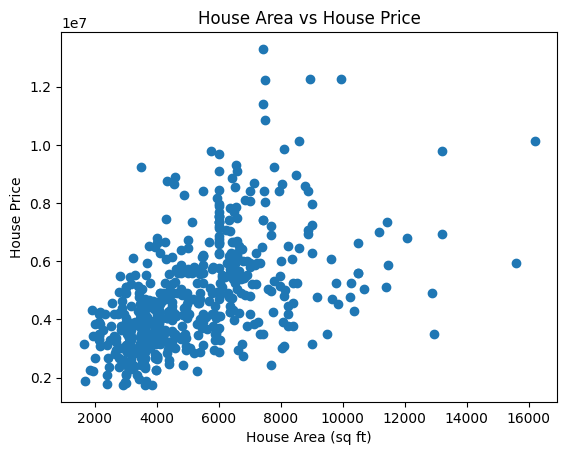

In [34]:
area = df['area']
price = df['price']
plt.figure()
plt.scatter(area, price)
plt.xlabel('House Area (sq ft)')
plt.ylabel('House Price')
plt.title('House Area vs House Price')
plt.show()

#### __Create a side-by-side subplot containing boxplots for both 'price' and 'area' to identify potential outliers and understand the spread of the data.__

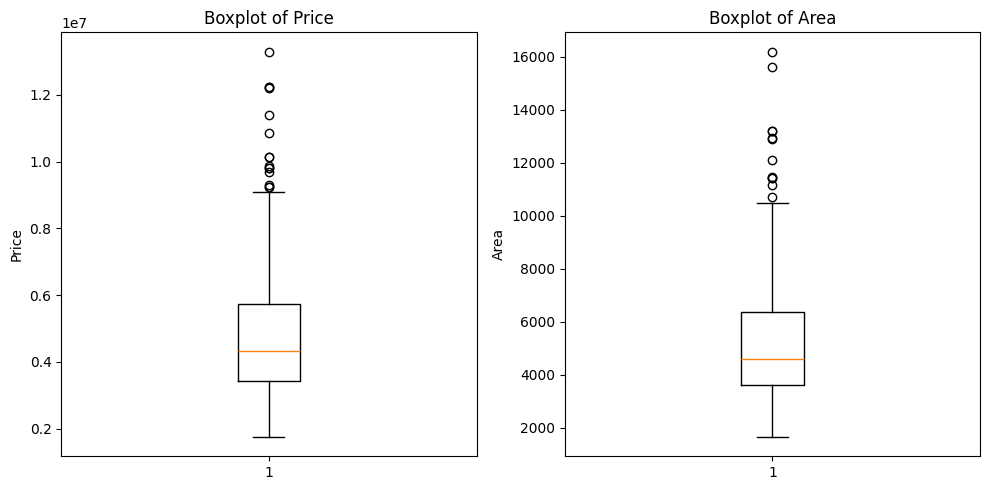

In [35]:
plt.figure(figsize=(10, 5))

# Subplot Price
plt.subplot(1, 2, 1)
plt.boxplot(df['price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')

# Subplot Area
plt.subplot(1, 2, 2)
plt.boxplot(df['area'])
plt.title('Boxplot of Area')
plt.ylabel('Area')

plt.tight_layout()
plt.show()


#### __Calculate the Interquartile Range (IQR) for the 'price' column and filter out the statistical outliers to ensure they don't skew the model.__

In [36]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[
    (df['price'] >= lower_bound) &
    (df['price'] <= upper_bound)
]

#### __Apply the IQR filtering method to the 'area' column to remove extreme values and visualize the cleaned distribution using a boxplot.__

In [37]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[
    (df['area'] >= lower_bound) &
    (df['area'] <= upper_bound)
]


#### __Generate a scatter plot of the cleaned data to verify the linear relationship between 'area' and 'price' after removing outliers.__

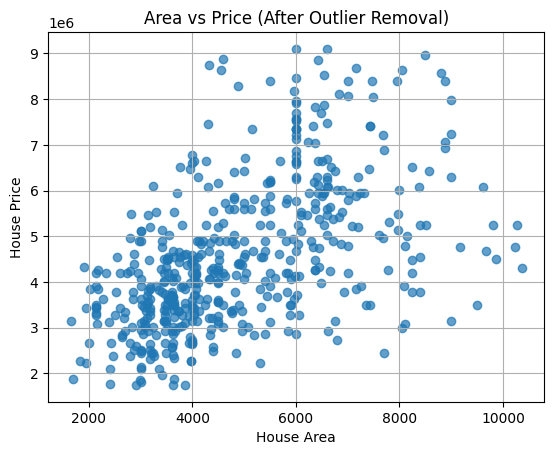

In [38]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['area'], df['price'], alpha=0.7)
plt.xlabel('House Area')
plt.ylabel('House Price')
plt.title('Area vs Price (After Outlier Removal)')
plt.grid(True)
plt.show()


#### __Split the dataset into training (70%) and testing (30%) sets, ensuring the split is reproducible by setting a random seed.__
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [39]:
!pip install scikit-learn

In [40]:
from sklearn.model_selection import train_test_split
X = df[['area']]   
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42
)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])



Training samples: 361
Testing samples: 156


#### __Initialize a Linear Regression model, fit it using the training data, and extract the resulting slope (coefficient) and intercept.__
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
slope = model.coef_[0]
intercept = model.intercept_
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)

Slope (Coefficient): 432.8616379593373
Intercept: 2412751.9376969477


#### __Use the trained model to predict house prices for the 'area' values in the test dataset.__

In [42]:
y_pred = model.predict(X_test)
print(y_pred)


[5555327.42928174 4131212.64039552 4403915.4723099  5031564.84735094
 4706918.61888144 5053207.9292489  4282714.21368128 3711336.85157496
 4936335.28699988 5204709.50253467 3867167.04124032 4360629.30851397
 4966635.60165704 4793490.9464733  5243667.04995101 3971053.83435056
 5269638.74822857 5009921.76545297 4423827.10765603 6380361.71123223
 4572731.51111404 3655064.83864025 4164110.12488043 4871406.04130598
 5165751.95511833 6897198.50695568 6308506.67933098 4079269.2438404
 3971053.83435056 3893138.73951788 3237353.35800949 3919110.43779544
 5317253.5284041  6221934.35173912 4490487.79990177 4161512.95505267
 3711336.85157496 6680767.68797601 5529355.73100418 4750204.78267737
 3789251.94640764 5620256.67497564 3789251.94640764 4161512.95505267
 3919110.43779544 3910453.20503625 5183066.42063671 4115629.62142898
 4079269.2438404  4144198.4895343  5269638.74822857 3659393.45501984
 3802237.79554642 5009921.76545297 3711336.85157496 4577060.12749363
 6092075.86035131 4161512.95505267 

#### __Import the Mean Squared Error metric from scikit-learn to calculate the average squared difference between the actual and predicted prices. Additionally, compute the Root Mean Squared Error (RMSE) to express the error in the same units as the house price.__
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html

In [43]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1937406726291.5625


In [44]:
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 1391907.5853991034
